# Modelo 1 Grid Search

## __1. Cargo el Dataframe y procedo a separar en Train y Test__

In [2]:
# Importar Librerias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv('../data/processed/processed_df.csv', index_col=0)

In [5]:
# Paso las columnas a minúsculas por comodidad
df.columns = df.columns.str.lower()
df.head()

,political lean,score,num of comments,capitalism,socialism,democrats,democraticsocialism,socialdemocracy,progressive,alltheleft,liberal,feminisms,communist,radicalfeminism,libertarian,conservatives,republicans,anarchocapitalism
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,6,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,7,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,6,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# Cambio el nombre de political lean a target
df.rename(columns={'political lean':'target'},inplace=True)
df.head()

,target,score,num of comments,capitalism,socialism,democrats,democraticsocialism,socialdemocracy,progressive,alltheleft,liberal,feminisms,communist,radicalfeminism,libertarian,conservatives,republicans,anarchocapitalism
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,6,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,7,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,6,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
df.drop(columns=['score','num of comments'],inplace=True)

In [8]:
# Separo el DF en Train y Test, me guardo el Test para las pruebas
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)

In [9]:
print('Train',df_train.shape)
print('Test',df_test.shape)

Train (8612, 16)
Test (4242, 16)


In [63]:
'''df_train.to_csv('train.csv')
df_test.to_csv('test.csv')'''

"df_train.to_csv('train.csv')\ndf_test.to_csv('test.csv')"

## __2. Separo df_train en X e y__

In [10]:
X = df_train.drop(columns='target')
y = df_train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (6889, 15)
X_test (1723, 15)
y_train (6889,)
y_test (1723,)


# __3. Grid Search__

In [12]:
# Parametros del Grid Search

In [13]:
reg_log = Pipeline(steps = [
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler()),
    # ("funcion", my_function())
    ("reglog", LogisticRegression())
])

rand_forest = RandomForestClassifier()


reg_log_param = {
    "imputer__strategy": ['mean', 'median'],
    "reglog__penalty": ['l1', 'l2'],
    "reglog__C": np.logspace(0, 4, 10)
}
rand_forest_param = {
    "n_estimators": [10, 100, 1000],
    "max_features": [1,2,3]
}



gs_reg_log = GridSearchCV(reg_log,
                         reg_log_param,
                         cv = 10,
                         scoring = 'accuracy',
                         verbose = 1,
                         n_jobs = -1)

gs_rand_forest = GridSearchCV(rand_forest,
                         rand_forest_param,
                         cv = 10,
                         scoring = 'accuracy',
                         verbose = 1,
                         n_jobs = -1)

grids = {"gs_reg_log": gs_reg_log,
        "gs_rand_forest": gs_rand_forest}

In [14]:
for nombre, grid_search in grids.items():
    grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


C:\Users\Carmelo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
200 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Carmelo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Carmelo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Carmelo\AppData\Local\Programs\Python\Python37

Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [15]:
print(gs_reg_log.best_score_)
print(gs_reg_log.best_params_)
print(gs_reg_log.best_estimator_)
print(gs_reg_log.best_estimator_['reglog'])

1.0
{'imputer__strategy': 'mean', 'reglog__C': 1.0, 'reglog__penalty': 'l2'}
Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('reglog', LogisticRegression())])
LogisticRegression()


In [16]:
print(gs_rand_forest.best_score_)
print(gs_rand_forest.best_params_)
print(gs_rand_forest.best_estimator_)

1.0
{'max_features': 1, 'n_estimators': 10}
RandomForestClassifier(max_features=1, n_estimators=10)


In [17]:
best_grids = [(i, j.best_score_) for i, j in grids.items()]

best_grids = pd.DataFrame(best_grids, columns=["Grid", "Best score"]).sort_values(by="Best score", ascending=False)
best_grids

,Grid,Best score
0,gs_reg_log,1.0
1,gs_rand_forest,1.0


In [18]:
preds = gs_reg_log.best_estimator_.predict(X_test)
accuracy_score(y_test, preds)

1.0

In [19]:
preds = gs_rand_forest.best_estimator_.predict(X_test)
accuracy_score(y_test, preds)

1.0

In [20]:
# El mejor modelo ha sido
best_model = gs_rand_forest.best_estimator_
best_model.score(X_test, y_test)

1.0

# __4. Aplicar los modelos:__

## 1. Logistic Regresion:

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [22]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [23]:
model.score(X_train, y_train)

1.0

In [24]:
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

1.0


Vemos como no da Overfitting porque no se pierde con los datos nuevos

In [26]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_pred, y_test))
    print( "Balanced Accuracy : ",balanced_accuracy_score(y_test, y_pred))
    cm=confusion_matrix(y_pred , y_test)
    plt.figure()
    plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
    plt.xticks(range(2), ['Negative',  'Positive'], fontsize=16,color='black')
    plt.yticks(range(2), ['Negative', 'Positive'], fontsize=16)
    plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1064
           1       1.00      1.00      1.00       659

    accuracy                           1.00      1723
   macro avg       1.00      1.00      1.00      1723
weighted avg       1.00      1.00      1.00      1723

Balanced Accuracy :  1.0


<Figure size 432x288 with 0 Axes>

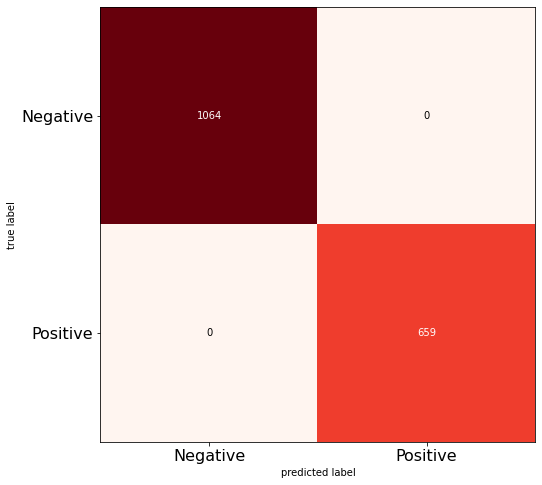

In [27]:
from sklearn.metrics import roc_curve, auc
dtc= LogisticRegression()
dtc.fit(X_train, y_train)
model_Evaluate(dtc)

## 2. RandomForest:

In [28]:
rfc = RandomForestClassifier(max_features=1, n_estimators=10)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features=1, n_estimators=10)

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,rfc.predict(X_test))

1.0

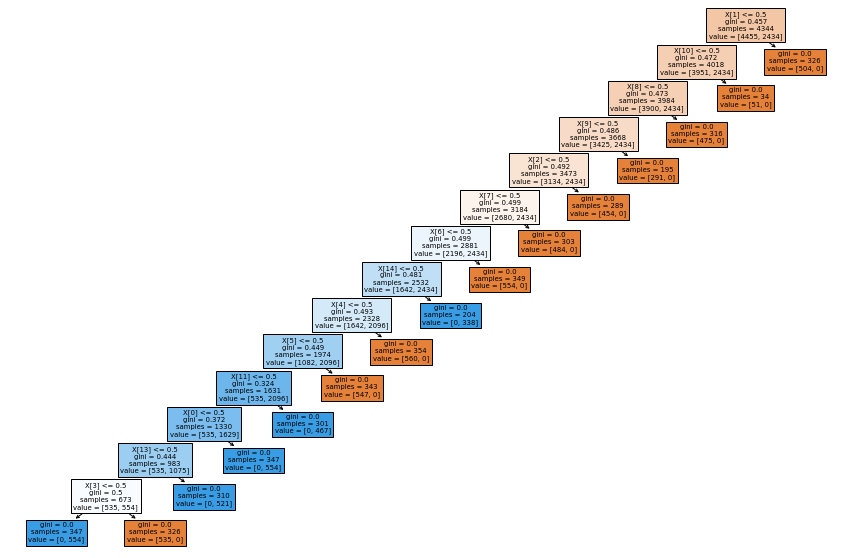

In [30]:
from sklearn import tree

plt.figure(figsize=(15,10))
for i in range(len(rfc.estimators_)):
    tree.plot_tree(rfc.estimators_[i],filled=True)

In [31]:
rfc.feature_importances_

array([0.12914412, 0.04376232, 0.03338545, 0.05033392, 0.04377699,
       0.05018951, 0.05879587, 0.04511014, 0.03767636, 0.01996971,
       0.00346404, 0.14038159, 0.13224128, 0.11561235, 0.09615637])

In [32]:
pd.DataFrame({'features':X_train.columns, 'importances':rfc.feature_importances_}).sort_values('importances', ascending=False)

,features,importances
11,libertarian,0.140382
12,conservatives,0.132241
0,capitalism,0.129144
13,republicans,0.115612
14,anarchocapitalism,0.096156
6,alltheleft,0.058796
3,democraticsocialism,0.050334
5,progressive,0.050190
7,liberal,0.045110
4,socialdemocracy,0.043777


In [33]:
y_pred = rfc.predict(X_test)

In [34]:
accuracy_score(y_test,rfc.predict(X_test))

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1064
           1       1.00      1.00      1.00       659

    accuracy                           1.00      1723
   macro avg       1.00      1.00      1.00      1723
weighted avg       1.00      1.00      1.00      1723

Balanced Accuracy :  1.0


<Figure size 432x288 with 0 Axes>

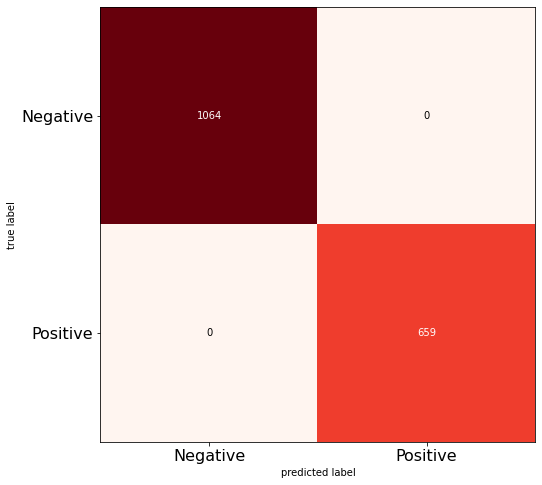

In [35]:
from sklearn.metrics import roc_curve, auc
dtc= RandomForestClassifier()
dtc.fit(X_train, y_train)
model_Evaluate(dtc)

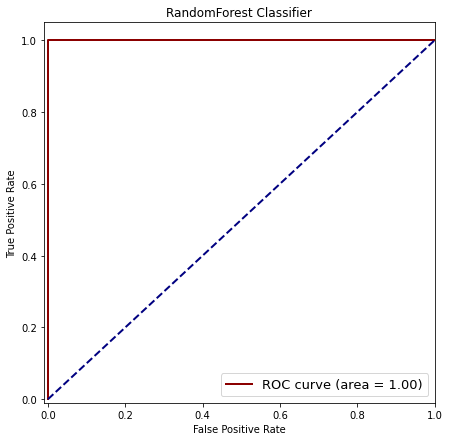

In [36]:
pred_dtc = dtc.predict_proba(X_test)[:,1]
fpr_dtc,tpr_dtc,_ = roc_curve(y_test.values,pred_dtc)
roc_auc_dtc = auc(fpr_dtc,tpr_dtc)


f, axes = plt.subplots(1, 1,figsize=(7,7))
axes.plot(fpr_dtc, tpr_dtc, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_dtc))
axes.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes.set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes.set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'RandomForest Classifier')
axes.legend(loc='lower right', fontsize=13)

In [37]:
X_prueba = df_test.drop(columns='target')
y_prueba = df_test['target']

C:\Users\Carmelo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


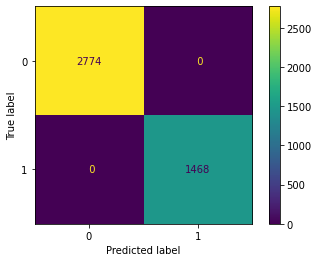

In [38]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rfc, X_prueba, y_prueba, values_format='3g');